In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-6-8473f2a98773>:16: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  y0 = array([a, b, 0, a*a])        # Initial conditions [x, v]
<ipython-input-6-8473f2a98773>:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  y02 = array([a, b, 0])
<ipython-input-6-8473f2a98773>:18: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t  = linspace(ini, fin, 10000) # Output times
<ipython-input-6-8473f2a98773>:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  return array([v, t*x+2*x*x*x,z,x*x])
<ipython-input-6-8473f2a98773>:12: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  return array([v, t*x+2*x*x*x,-x])


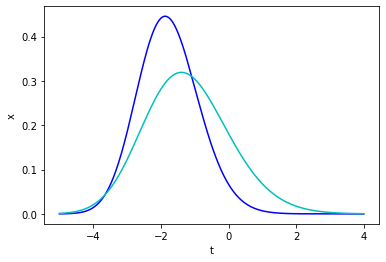

In [6]:
from scipy import *
from scipy.integrate import odeint
from scipy import special
from scipy.integrate import solve_ivp
#Función que usaremos para el sistema de ecuaciones diferenciales
def ydot(y, t):
    x, v, w, z = y[0], y[1], y[2], y[3]
    return array([v, t*x+2*x*x*x,z,x*x])
#Otra función que usaremos para el sistema de ecuaciones diferenciales
def y2dot(y,t):
    x, v, w = y[0], y[1], y[2]
    return array([v, t*x+2*x*x*x,-x])
ini = 4
fin = -5
a, b, c, d = special.airy(ini)  
y0 = array([a, b, 0, a*a])        # Initial conditions [x, v]
y02 = array([a, b, 0])
t  = linspace(ini, fin, 10000) # Output times

#Resolvemos el sistema de ecuaciones diferenciales d/dx(q,q',I,I')=(q',tq+2q^3,I',q^2)
y = odeint(ydot, y0, t)
#Resolvemos el sistema de ecuaciones diferenciales d/dx(q,q',J)=(q',tq+2q^3,-q)
y2 = odeint(y2dot,y02,t)
#Obtenemos la función de distribución acumulada F2
F2 = np.exp(-y[:,2])
#Obtenemos la función de distribución acumulada F1
F1_2 = np.exp(-y2[:,2])

F1 = np.sqrt(F2*F1_2)
#Calculamos las funciones de densidad f2,f1
f2 = np.gradient(F2,t)

f1 = np.gradient(F1,t)

## Plot x versus t
plt.plot(t, f2, 'b-')
plt.plot(t,f1,'c-')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

(array([6.000e-04, 1.000e-03, 1.400e-03, 2.000e-03, 3.400e-03, 5.600e-03,
        9.000e-03, 1.260e-02, 1.440e-02, 2.000e-02, 2.560e-02, 3.400e-02,
        4.620e-02, 5.900e-02, 7.280e-02, 8.780e-02, 1.036e-01, 1.256e-01,
        1.518e-01, 1.788e-01, 2.054e-01, 2.350e-01, 2.656e-01, 2.972e-01,
        3.344e-01, 3.722e-01, 4.064e-01, 4.416e-01, 4.748e-01, 5.106e-01,
        5.466e-01, 5.792e-01, 6.144e-01, 6.506e-01, 6.782e-01, 7.088e-01,
        7.364e-01, 7.638e-01, 7.838e-01, 8.040e-01, 8.230e-01, 8.418e-01,
        8.582e-01, 8.722e-01, 8.846e-01, 8.998e-01, 9.096e-01, 9.196e-01,
        9.264e-01, 9.366e-01, 9.438e-01, 9.524e-01, 9.592e-01, 9.656e-01,
        9.678e-01, 9.722e-01, 9.766e-01, 9.802e-01, 9.826e-01, 9.846e-01,
        9.860e-01, 9.880e-01, 9.894e-01, 9.902e-01, 9.924e-01, 9.940e-01,
        9.954e-01, 9.958e-01, 9.964e-01, 9.968e-01, 9.970e-01, 9.978e-01,
        9.982e-01, 9.984e-01, 9.984e-01, 9.988e-01, 9.988e-01, 9.990e-01,
        9.992e-01, 9.994e-01, 9.996e-0

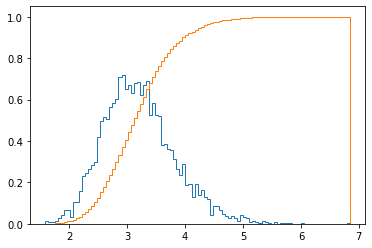

In [15]:
#Distribución empírica del eigenvalor más grande de una matriz Wishart_10(10,I)
n= 10
p = 10
eigen = []
#Tomamos 5000 muestras de una matriz con distribución W
for i in range(5000):
    #Generamos W
    W = np.zeros((p,p))
    for j in range(n):
        z = np.random.randn(p,1)
        W = W+z.dot(np.transpose(z))
    W = W/n
    #Guardamos el eigenvalor más grande
    eigenvalues, eigenvectors = np.linalg.eigh(W)
    eigen.append(eigenvalues[p-1])
#Graficamos la densidad de la distribución empírica y la acumulada
plt.hist(eigen,density=True,bins=100,histtype='step')
plt.hist(eigen,density=True,bins=100,histtype='step',cumulative=True)

In [37]:
#Encontramos el p-valor de 4.3
n = 10
p = 10
#Transformamos el eigenvalor a un valor en el rango de F1
mu_0 = (np.sqrt(n-.5)+np.sqrt(p-.5))*(np.sqrt(n-.5)+np.sqrt(p-.5))
sigma_0 = (np.sqrt(n-.5)+np.sqrt(p-.5))*np.cbrt((1/np.sqrt(n-.5)+1/np.sqrt(p-.5)))
eigencheck = 4.3
transf = (eigencheck*n-mu_0)/sigma_0
print(transf)
#Encontramos el p-valor
Ans = np.argmin(np.abs(t-transf))
print(F1[Ans])

0.93689044196079
0.9471922932664191


In [39]:
#Encontramos el eigenvalor a partir del cual la cola derecha tiene .01 de probabilidad de ocurrencia
pvalor = .01
Arg = np.argmin(np.abs(F1-1+pvalor))
print((t[Arg]*sigma_0+mu_0)/n)

4.873124983482416


In [38]:
#Encontramos el eigenvalor a partir del cual la cola derecha tiene .05 de probabilidad de ocurrencia
pvalor = .05
Arg = np.argmin(np.abs(F1-1+pvalor))
print((t[Arg]*sigma_0+mu_0)/n)

4.321190961091505


In [40]:
#Encontramos el eigenvalor a partir del cual la cola derecha tiene .1 de probabilidad de ocurrencia
pvalor = .1
Arg = np.argmin(np.abs(F1-1+pvalor))
print((t[Arg]*sigma_0+mu_0)/n)

4.039219445736008


In [9]:
#Generación de la matriz de cargas L, con distribución normal  de media b11' y varianza sigma_bI
def generateL(p,k,b,sigma_b):
    return np.random.normal(0,1,(p,k))*np.sqrt(sigma_b)+b

In [10]:
#Generación de la matriz de factores F, con distribuión normal de media 0 y matriz de covarianzas sigma_fI
def generateF(n,sigma_b,k):
    return np.random.normal(0,1,(n,k))*np.sqrt(sigma_f)

In [11]:
#Generación de la matriz de ruido idiosincrático E, con distribucion normal de media 0 y matriz de covarianzas sigma_eI
def generaterror(p,n,sigma_e):
    return np.random.normal(0,1,(p,n))*np.sqrt(sigma_e)

In [12]:
#Función que simula una matriz de retornos R, bajo los supuestos del modelo de Brown
def simulateR(k,b,sigma_b,sigma_e,i,n):
    L = generateL(i,k,b,sigma_b)
    F = generateF(n,sigma_b,k)
    error = generaterror(i,n,sigma_e)
    return np.dot(L,np.transpose(F))+error

In [13]:
#Inicializamos los parámetros del modelo
k = 4
b = 1
sigma_b = .01
sigma_f = .000158
sigma_e = .0045
n = 80

In [14]:
#La matriz prom contendra para cada valor de p, los valores medios de los 5 eigenvalores más grandes
prom = np.zeros(251*5).reshape(251,5)
#La matriz interq contendra para cada valor de p, los valores en los cuantiles intermedios del eigenvalor experimental más grande
interq = np.zeros(251*3).reshape(251,3)
#En el vector veceigen almacenamos el eigenvalor más grande obtenido en cada uno de los 100 repeticiones
veceigen =np.zeros(100)
#Para cada valor de p
for i in range(50,301): 
    #Realizamos 100 experimentos donde
    for j in range(100):
        R = simulateR(k,b,sigma_b,sigma_e,i,n)#Simulamos una matriz de retornos
        Cov = (1/n)*np.dot(R,np.transpose(R))#Calculamos su covarianza
        eigenvalues , eigenvectors = np.linalg.eigh(Cov)#Obtenemos los eigenvalores de esa matriz
        eigen = np.flip(eigenvalues)[0:5]#Los ordenamos de mayor a menor
        #Vamos sumando los eigenvalores más grandes, los segundos más grandes, etc
        prom[i-50,0] = prom[i-50,0] + eigen[0]
        prom[i-50,1] = prom[i-50,1] + eigen[1]
        prom[i-50,2] = prom[i-50,2] + eigen[2]
        prom[i-50,3] = prom[i-50,3] + eigen[3]
        prom[i-50,4] = prom[i-50,4] + eigen[4]
        veceigen[j] = eigen[0]#Almacenamos el eigenvalor más grande en veceigen
    #Calculamos los intercuantiles del eigenvalor experimental más grande
    interq[i-50,0] = np.percentile(veceigen,25)
    interq[i-50,1] = np.percentile(veceigen,50)
    interq[i-50,2] = np.percentile(veceigen,75)
    #Calculamos el valor promedio sobre los 100 experimentos del eigenvalor más grande y de los siguientes 4
    prom[i-50,0] = prom[i-50,0]/100
    prom[i-50,1] = prom[i-50,1]/100
    prom[i-50,2] = prom[i-50,2]/100
    prom[i-50,3] = prom[i-50,3]/100
    prom[i-50,4] = prom[i-50,4]/100

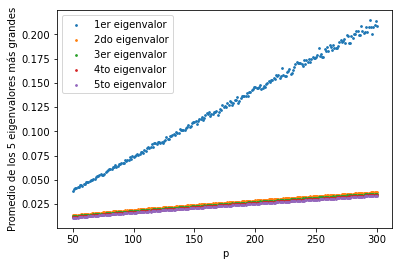

In [16]:
x = np.zeros(251)
for i in range(50,301):
    x[i-50] = i
#Graficamos la gráfica con los 5 eigenvalores experimentales más grandes para cada valor de p
plt.scatter(x,prom[:,0],s=3,label="1er eigenvalor")
plt.scatter(x,prom[:,1],s=3,label="2do eigenvalor")
plt.scatter(x,prom[:,2],s=3,label="3er eigenvalor")
plt.scatter(x,prom[:,3],s=3,label="4to eigenvalor")
plt.scatter(x,prom[:,4],s=3,label="5to eigenvalor")
plt.xlabel("p")
plt.ylabel("Promedio de los 5 eigenvalores más grandes")
plt.legend(loc='upper left')

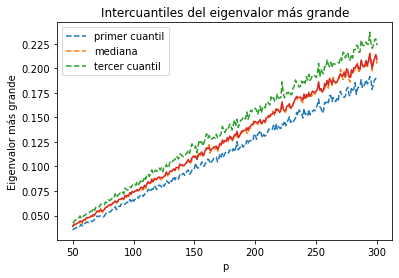

In [17]:
#Graficamos el eigenvalor experimental más grande junto a sus interquantiles 
plt.plot(x,interq[:,0],linestyle='--',label="primer cuantil")
plt.plot(x,interq[:,1],linestyle='--',label="mediana")
plt.plot(x,interq[:,2],linestyle='--',label="tercer cuantil")
plt.plot(x,prom[:,0])
plt.xlabel("p")
plt.ylabel("Eigenvalor más grande")
plt.title("Intercuantiles del eigenvalor más grande")
plt.legend(loc='upper left')
plt.show()

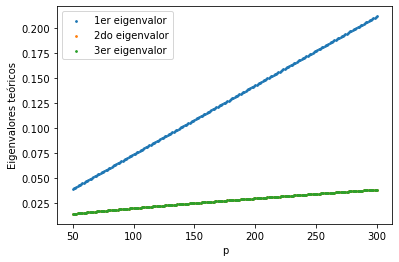

In [18]:
x = np.zeros(251)#Almacena los valores de p
y1 = np.zeros(251)#Almacena los valores del eigenvalor teórico más grande
y2 = np.zeros(251)# Almacena los valores teóricos de los eigenvalores 2 al k
y3 = np.zeros(251)# Almacena los valores teóricos de los eigenvalores k+1 al p
#Calculamos los eigenvalores de forma teórica de acuerdo al modelo de Brown
for i in range(50,301):
    x[i-50] = i
    y1[i-50] = (i*sigma_f*(sigma_b+k*b*b)+sigma_e)*(1+sigma_e/(n*sigma_f*(sigma_b+k*b*b)))
    if(i>=(sigma_e*sigma_e)/(n*sigma_f*sigma_f*sigma_b*sigma_b)):
        y2[i-50] = (i*sigma_f*sigma_b+sigma_e)*(1+sigma_e/(n*sigma_f*sigma_b))
    else :
        y2[i-50] = sigma_e*(1+np.sqrt(i/n))*(1+np.sqrt(i/n))
    y3[i-50] = sigma_e*(1+np.sqrt(i/n))*(1+np.sqrt(i/n))
#Graficamos los resultados teóricos
plt.scatter(x,y1,s=3,label="1er eigenvalor")
plt.scatter(x,y2,s=3,label="2do eigenvalor")
plt.scatter(x,y3,s=3,label="3er eigenvalor")
plt.xlabel("p")
plt.ylabel("Eigenvalores teóricos")
plt.legend(loc="upper left")

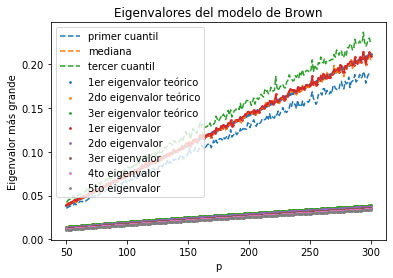

In [19]:
#Grafica que concentra todos los resultados anteriores
plt.scatter(x,y1,s=3,label="1er eigenvalor teórico")
plt.scatter(x,y2,s=3,label="2do eigenvalor teórico")
plt.scatter(x,y3,s=3,label="3er eigenvalor teórico")
plt.scatter(x,prom[:,0],s=3,label="1er eigenvalor")
plt.scatter(x,prom[:,1],s=3,label="2do eigenvalor")
plt.scatter(x,prom[:,2],s=3,label="3er eigenvalor")
plt.scatter(x,prom[:,3],s=3,label="4to eigenvalor")
plt.scatter(x,prom[:,4],s=3,label="5to eigenvalor")
plt.plot(x,interq[:,0],linestyle='--',label="primer cuantil")
plt.plot(x,interq[:,1],linestyle='--',label="mediana")
plt.plot(x,interq[:,2],linestyle='--',label="tercer cuantil")
plt.plot(x,prom[:,0])
plt.xlabel("p")
plt.ylabel("Eigenvalor más grande")
plt.title("Eigenvalores del modelo de Brown")
plt.legend(loc='upper left')
plt.show()